In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# import the covid-19 confirmed dataset
df = pd.read_csv(r"C:\Users\Sub\CodeSpace\AI\dnn-python-from-scratch\time_series_covid_19_confirmed.csv")

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [4]:
# drop provinc, country ,lat and long
df = df.drop(['Province/State','Country/Region','Lat','Long'],axis=1)

In [5]:
df.head()

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020
0,2,3,5,7,8,8,14,14,14,19,...,47,48,50,50,50,53,59,70,75,82
1,2,1,2,2,4,4,7,7,11,15,...,360,420,461,502,511,581,639,639,701,773
2,0,1,3,3,4,5,7,7,10,13,...,117,130,138,150,150,160,178,178,200,212
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,50,83,93,99,117,129,149,149,197,238


In [6]:
# take the last date as y and rest as x and use Standarscaler
X = df.drop(['3/14/2020'],axis=1)
y = df['3/14/2020']
sc = StandardScaler()
X_normalized = sc.fit_transform(X)

In [7]:
X_normalized.shape

(442, 52)

In [8]:
# use no. of dimesion [0] of normalized data
# no. of dense layers would be 16,16,126,160,10,1 optimizer would be adam matrices would be mae and mse
n_dims = X_normalized.shape[1]
dnnModel = tf.keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(n_dims,)),
    layers.Dense(16,activation='relu'),
    layers.Dense(126,activation='relu'),
    layers.Dense(160,activation='relu'),
    layers.Dense(10,activation='relu'),
    layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
dnnModel.compile(optimizer=optimizer,loss=tf.keras.losses.mse,metrics=['mae','mse'])

In [9]:
dnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                848       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 126)               2142      
                                                                 
 dense_3 (Dense)             (None, 160)               20320     
                                                                 
 dense_4 (Dense)             (None, 10)                1610      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 25,203
Trainable params: 25,203
Non-traina

In [13]:
# train the data with 500 epochs , hint : dnnmodel.fit()
Epochs = 500
history=dnnModel.fit(X,y,epochs=Epochs,validation_split=0.2)

Epoch 1/500
12/12 [==============================] - 0s 14ms/step - loss: 240670774132736.0000 - mae: 1314488.1250 - mse: 240670774132736.0000 - val_loss: 13414836224.0000 - val_mae: 12673.6689 - val_mse: 13414836224.0000
Epoch 2/500
12/12 [==============================] - 0s 10ms/step - loss: 188913968742400.0000 - mae: 1173006.8750 - mse: 188913968742400.0000 - val_loss: 12014064640.0000 - val_mae: 11987.8535 - val_mse: 12014064640.0000
Epoch 3/500
12/12 [==============================] - 0s 8ms/step - loss: 162117298683904.0000 - mae: 1085381.1250 - mse: 162117298683904.0000 - val_loss: 10526541824.0000 - val_mae: 11216.4697 - val_mse: 10526541824.0000
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 140269202702336.0000 - mae: 1011052.1250 - mse: 140269202702336.0000 - val_loss: 9395655680.0000 - val_mae: 10592.8340 - val_mse: 9395655680.0000
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 124575341871104.0000 - mae: 952252.7500 - m

In [14]:
# Convert the history.history in hist dataframe also save the epochs in epoch columns
hist = pd.DataFrame(history.history)
hist['epochs'] = history.epoch
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epochs
0,2.406708e+14,1314488.125,2.406708e+14,1.341484e+10,12673.668945,1.341484e+10,0
1,1.889140e+14,1173006.875,1.889140e+14,1.201406e+10,11987.853516,1.201406e+10,1
2,1.621173e+14,1085381.125,1.621173e+14,1.052654e+10,11216.469727,1.052654e+10,2
3,1.402692e+14,1011052.125,1.402692e+14,9.395656e+09,10592.833984,9.395656e+09,3
4,1.245753e+14,952252.750,1.245753e+14,8.521178e+09,10084.415039,8.521178e+09,4


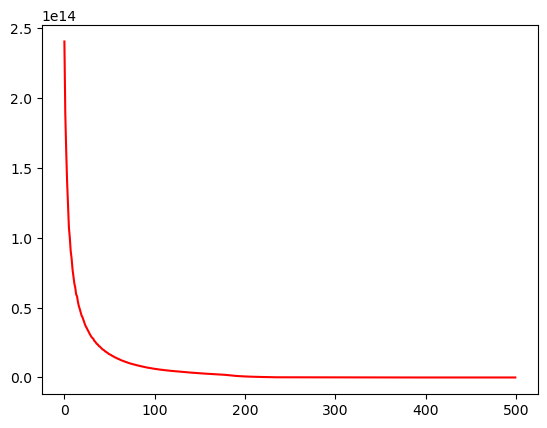

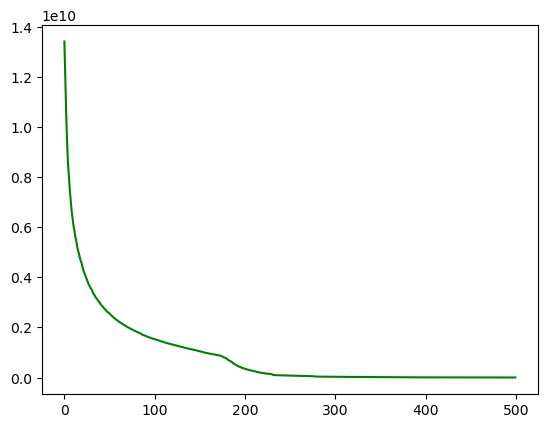

In [15]:
# plot the mae and val_mae of above dataframe
plt.plot(hist['mse'],'red')
plt.show()
plt.plot(hist['val_mse'],'green')
plt.show()